In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
A = torch.full((3,13), 1)
(A[1,:], A[:,[1, -2]]) = (2, 2)
B = torch.full((2,13), 1)
B[:,[1,-1]],B[:,[3,4,8,9]] = (2,3)
torch.cat((A,B,A,B,A))

tensor([[1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1.],
        [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
        [1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1.],
        [1., 2., 1., 3., 3., 1., 1., 1., 3., 3., 1., 1., 2.],
        [1., 2., 1., 3., 3., 1., 1., 1., 3., 3., 1., 1., 2.],
        [1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1.],
        [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
        [1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1.],
        [1., 2., 1., 3., 3., 1., 1., 1., 3., 3., 1., 1., 2.],
        [1., 2., 1., 3., 3., 1., 1., 1., 3., 3., 1., 1., 2.],
        [1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1.],
        [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
        [1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1.]])

In [3]:
%time
import time
t1 = time.perf_counter()
C = torch.empty((500,500)).normal_(mean =0, std = 1)
D = torch.empty((500,500)).normal_(mean =0, std = 1)

t2 = time.perf_counter()
print("\n",C * D)

flop = 500**3/(t2 - t1)
print("\n The floating point is given as {}".format(flop))


CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.01 µs

 tensor([[ 0.5472, -1.8213, -0.0068,  ...,  0.5031, -2.5860, -0.8178],
        [ 0.4329, -0.0163, -0.1046,  ...,  0.5563,  0.5289,  1.7182],
        [ 0.7524, -0.9363, -0.2939,  ..., -0.2255, -0.3119, -0.8302],
        ...,
        [ 0.4858, -0.1944, -1.2193,  ...,  0.4941,  0.4412,  0.0070],
        [-1.8077, -0.0087, -0.7904,  ...,  0.0068,  0.0873,  0.6496],
        [-0.1867, -1.1338, -3.6676,  ...,  0.0306, -0.2121,  0.1408]])

 The floating point is given as 23527449780.53625


In [4]:
def mul_row(m):
    for row in range(m.shape[0]):
        m[row,:] = (row+1)*m[row,:]
    return m

In [5]:
%time
mul_row(torch.full((4,8), 2))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.72 µs


tensor([[2., 2., 2., 2., 2., 2., 2., 2.],
        [4., 4., 4., 4., 4., 4., 4., 4.],
        [6., 6., 6., 6., 6., 6., 6., 6.],
        [8., 8., 8., 8., 8., 8., 8., 8.]])

In [6]:
%time
mul_row(torch.full((1000,400), 3))

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.78 µs


tensor([[   3.,    3.,    3.,  ...,    3.,    3.,    3.],
        [   6.,    6.,    6.,  ...,    6.,    6.,    6.],
        [   9.,    9.,    9.,  ...,    9.,    9.,    9.],
        ...,
        [2994., 2994., 2994.,  ..., 2994., 2994., 2994.],
        [2997., 2997., 2997.,  ..., 2997., 2997., 2997.],
        [3000., 3000., 3000.,  ..., 3000., 3000., 3000.]])

In [7]:
from dlc_practical_prologue import load_data

In [8]:
train_input, train_target, test_input, test_target = load_data(one_hot_labels=True, normalize=True)

* Using MNIST


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


** Reduce the data-set (use --full for the full thing)
** Use 1000 train and 1000 test samples


In [9]:
def sigma(x):
    return torch.tanh(x)

def dsigma(x):
    return (1-sigma(x)**2)

def loss(v, t):
    return (v-t).pow(2).sum()

def dloss(v, t):
    return 2*(v-t)

In [10]:
train_input *= .9
train_input

tensor([[-0.3782, -0.3782, -0.3782,  ..., -0.3782, -0.3782, -0.3782],
        [-0.3782, -0.3782, -0.3782,  ..., -0.3782, -0.3782, -0.3782],
        [-0.3782, -0.3782, -0.3782,  ..., -0.3782, -0.3782, -0.3782],
        ...,
        [-0.3782, -0.3782, -0.3782,  ..., -0.3782, -0.3782, -0.3782],
        [-0.3782, -0.3782, -0.3782,  ..., -0.3782, -0.3782, -0.3782],
        [-0.3782, -0.3782, -0.3782,  ..., -0.3782, -0.3782, -0.3782]])

In [11]:
#A session with israel

In [12]:
from torch.autograd import Variable
from torch import nn
from torch.nn import functional as F

import dlc_practical_prologue as prologue

train_input, train_target, test_input, test_target = \
    prologue.load_data(one_hot_labels = True, normalize = True, flatten = False)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5)
        self.fc1 = nn.Linear(256, 200)
        self.fc2 = nn.Linear(200, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), kernel_size=3, stride=3))
        x = F.relu(F.max_pool2d(self.conv2(x), kernel_size=2, stride=2))
        x = F.relu(self.fc1(x.view(-1, 256)))
        x = self.fc2(x)
        return x

* Using MNIST
** Reduce the data-set (use --full for the full thing)
** Use 1000 train and 1000 test samples


In [13]:
def train(model, train_input, train_target, eta, mini_batch_size, epoch):
    criterion = nn.MSELoss()
#     eta, mini_batch_size = 1e-1, 100    
    loss_con = []
    
    for e in range(0, epoch):
        sum_loss = 0
        # We do this with mini-batches
        for b in range(0, train_input.size(0), mini_batch_size):
            output = model(train_input.narrow(0, b, mini_batch_size))
            loss = criterion(output, train_target.narrow(0, b, mini_batch_size))
            sum_loss = sum_loss + loss.item()
            model.zero_grad()
            loss.backward()
            for p in model.parameters():
                p.data.sub_(eta * p.grad.data)
        loss_con.append(sum_loss)
#         print(e, sum_loss)
    return loss_con, p#e, sum_loss

In [14]:
model = Net()
train_input, train_target = Variable(train_input), Variable(train_target)

In [15]:
loss, param = train(model, train_input, train_target, eta = 1e-1, mini_batch_size = 100, epoch = 25)

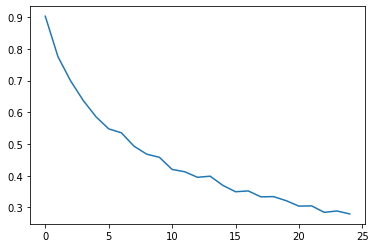

In [16]:
plt.plot([i for  i in range(len(loss))],loss )

In [17]:
def compute_nb_errors(model, test_input, test_target, mini_batch_size):
    model.eval()
    correctHits=0
    total=0
#     accuracy=0
    sum_loss = 0
#     for data,output in test_input, test_target:
    for b in range(0, test_input.size(0), mini_batch_size):
        prediction = model(test_input.narrow(0, b, mini_batch_size))
        output = test_target.narrow(0, b, mini_batch_size)
#         loss = criterion(prediction, output)
#         sum_loss = sum_loss + loss.item()
        _,prediction = torch.max(prediction.data,1)  #returns max as well as its index
        output = torch.argmax(output, 1)
#         t1 = torch.argmax(output, dim=1)
#         acc = int(sum(prediction == t1))/t1.size(0)
        total += output.size(0)
        correctHits += (prediction==output).sum().item()
        accuracy = (correctHits/total)*100
    print('Accuracy = '+str(accuracy))
#         print(acc)
#     return acc#prediction

In [18]:
compute_nb_errors(model, test_input, test_target, 1)

Accuracy = 84.39999999999999


In [19]:
class Net1(nn.Module):
    def __init__(self, n_hidden):
        super(Net1, self).__init__()
        self.n_hidden = n_hidden
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5)
        self.fc1 = nn.Linear(256, self.n_hidden)
        self.fc2 = nn.Linear(self.n_hidden, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), kernel_size=3, stride=3))
        x = F.relu(F.max_pool2d(self.conv2(x), kernel_size=2, stride=2))
        x = F.relu(self.fc1(x.view(-1, 256)))
        x = self.fc2(x)
        return x

In [20]:
model = Net1(200)

In [21]:
def n_shape(n, p, k, s):
    return (n +2*p-k)/s +1

In [36]:
n_shape(110, 0,5,1)
#n_shape for conv and pooling
#output-vol: n_shape*n_shape* conv_channel_in
#param_cal: [k*k*RGB(3)] * conv_channel_in
#pooling layer no parameter

106.0

In [23]:
class Net2(nn.Module):
    def __init__(self, n_hidden):
        super(Net2, self).__init__()
        self.n_hidden = n_hidden
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=2, padding=2)
        self.fc1 = nn.Linear(512, self.n_hidden)
        self.fc2 = nn.Linear(self.n_hidden, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), kernel_size=3, stride=3))
        x = F.relu(F.max_pool2d(self.conv2(x), kernel_size=2, stride=2))
        x = F.relu(F.max_pool2d(self.conv3(x), kernel_size=2, stride=2))
        x = F.relu(self.fc1(x.view(-1, 512)))
        x = self.fc2(x)
        return x

In [26]:
Net2(5)

Net2(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(2, 2), stride=(1, 1), padding=(2, 2))
  (fc1): Linear(in_features=512, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=10, bias=True)
)

In [32]:
class MLP(nn.Module):
    def __init__(self, input_dim,  hidden_dim, output_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim,  hidden_dim)
        self.tanh = nn.Tanh()
        self.fc2 = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.tanh(out)
        out = self.fc2(out)
        return out
        

In [33]:
MLP(3,2,4)

MLP(
  (fc1): Linear(in_features=3, out_features=2, bias=True)
  (tanh): Tanh()
  (fc2): Linear(in_features=2, out_features=4, bias=True)
)